# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Look at the first few entries
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Testing mean temperature assumption of 98.6 

In [3]:
print("Number of samples = {:d}".format(len(df)))

Number of samples = 130


Let's look at the distribution of temperatures visually:
* Histogram
* Q-Q plot 

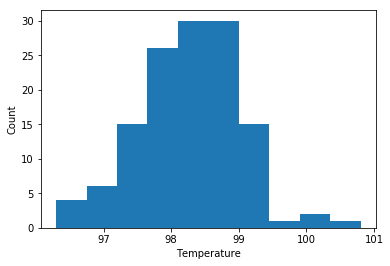

In [4]:
plt.hist(df['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

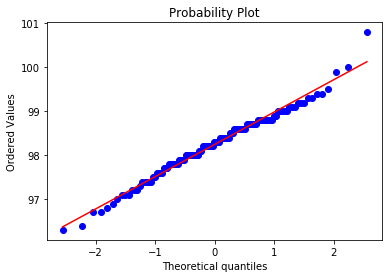

In [5]:
stats.probplot(df['temperature'], dist = 'norm', plot=plt)
None

Theoretical and observed quantiles are quite close, so temperature is fairly normal. Let's test the hypothesis that the true population mean is 98.6 degrees. 

For the whole population, we will use a one sample test. There are 130 observations so a z-test and t-test would be very similar and it does not matter which one to use.

In [6]:
mu0 = 98.6 # Hypothesis

# Test statistic
temps = df['temperature'].values
ts = (np.mean(temps) - mu0)/(np.std(temps)/np.sqrt(len(temps)))
print("Mean T of sample = {:.2f}".format(np.mean(temps)),
      "Std T of sample = {:.2f}".format(np.std(temps)))
print("Test statistic = {:.2f}".format(ts))

Mean T of sample = 98.25 Std T of sample = 0.73
Test statistic = -5.48


This test statistic is very low, and we can reject the null hypothesis. Let's compute the p-value (two sided):

In [7]:
pval_z = 2*stats.norm.cdf(ts)
pval_t = 2*stats.t.cdf(ts, len(temps)-1)
print("z-test p-value = {:.2e}".format(pval_z))
print("t-test p-value = {:.2e}".format(pval_t))

z-test p-value = 4.35e-08
t-test p-value = 2.19e-07


Let's contsruct a 95% confidence interval around the sample mean to specify a region of temperatures that would be considered normal:

In [8]:
low = np.mean(temps) - stats.norm.ppf(0.95)*np.std(temps)/np.sqrt(len(temps))
high = np.mean(temps) + stats.norm.ppf(0.95)*np.std(temps)/np.sqrt(len(temps))
print("The 95% confidence interval is [{:.2f},{:.2f}]".format(low,high))

The 95% confidence interval is [98.14,98.35]


### Male-Female body temperature difference

Let's now check whether there is a difference between male and female body temperatures

In [10]:
male_temps = df[df['gender'] == 'M']['temperature']
female_temps = df[df['gender'] == 'F']['temperature']

Let's construct a test statistic. We will perform this assuming both equal and non-equal variances.

In [11]:
difference = np.mean(female_temps) - np.mean(male_temps)
n_F = len(female_temps)
n_M = len(male_temps)
s_F = np.std(female_temps)
s_M = np.std(male_temps)
pooled_S = np.sqrt(((n_F-1)*s_F**2 + (n_M-1)*s_M**2)/(n_F+n_M-2)) #equal variance assumed
total_S = np.sqrt( s_F**2/n_F + s_M**2/n_M )

# Test statistic
t_ts = (difference)/(pooled_S*np.sqrt(1/n_F + 1/n_M))
z_ts = (difference)/total_S
print("t-Test statistic with equal varience assumption = {:.4f}".format(t_ts))
print("z-Test statistic = {:.4f}".format(z_ts))

t-Test statistic with equal varience assumption = 2.3032
z-Test statistic = 2.3032


Again, z or t test should not matter due to large sample size.

In [12]:
pval_t = 2*stats.t.sf(t_ts, df = n_F+n_M-2)
pval_z = 2*stats.norm.sf(z_ts)
print("z-test p-value = {:.4f}".format(pval_z))
print("t-test p-value = {:.4f}".format(pval_t))

z-test p-value = 0.0213
t-test p-value = 0.0229


So, the we can reject the null hypothesis (no difference between male and female mean body temperatures) at %5 level. At a lower significance level, e.g. %1, we would fail to reject.

Let's use `scipy.stats` t-test functions as well and check whether the assumption of equal variances matter in the t-test:

In [13]:
pval_t_eqvar = stats.ttest_ind(female_temps, male_temps, equal_var=True)[1]
pval_t_neqvar = stats.ttest_ind(female_temps, male_temps, equal_var=False)[1]
print("t-test p-value (equal variences) = {:.6f}".format(pval_t_eqvar))
print("t-test p-value (non-equal variences) = {:.6f}".format(pval_t_neqvar))

t-test p-value (equal variences) = 0.023932
t-test p-value (non-equal variences) = 0.023938


Therefore, assuming equal or non-equal variances does not matter.

Let's also perform a permutation test to compute the p-value exactly from simulations:

In [14]:
pool = np.hstack((female_temps,male_temps))
nsim = 10000
permuted_differences = np.zeros(nsim)
for sim in range(nsim):
    np.random.shuffle(pool)
    permuted_differences[sim] = np.mean(pool[:65]) - np.mean(pool[65:])

# Compute exact p-value: 
# Probability of the randomly shuffled difference being as high or higher than the actual difference?
p_exact = np.sum(permuted_differences >= difference)/len(permuted_differences)
print("Exact p-value = {:.4f}".format(p_exact))

Exact p-value = 0.0141


which is a slightly lower p-value, supporting rejection at %5 level (but not at %1).

### Effect sizes

There is evidence (at 5% significance) that female body temperatures are on average higher than males, based on p-values. However, to check whether it is an important difference, we need to look at effect sizes:

1. Probability of superiority
2. Overlap
3. Cohen's d

In [15]:
P_super = (female_temps.values > male_temps.values).mean()
print("Probability of superiority= {:.4f}".format(P_super))

Probability of superiority= 0.5538


Only 55% percent of the time, the female body temperature is higher than the male body temperature in the given sample. Not a very large effect size!

Let's compute the overlap as well:

In [16]:
threshold = (np.mean(female_temps) + np.mean(male_temps))/2
female_below = np.sum(female_temps < threshold)
male_above = np.sum(male_temps > threshold)
overlap = (female_below + male_above) / len(female_temps)

In [17]:
print("Overlap = {:.2f}".format(overlap))

Overlap = 0.85


There is a large overlap between male and female body temperature distributions, indicating a small effect size. Finally, let's look at Cohen's d:

In [18]:
cohen_d = (np.mean(female_temps) - np.mean(male_temps)) / pooled_S
print("Cohen's d = {:.2f}".format(cohen_d))

Cohen's d = 0.40


Therefore, while the female average body temperatures seem to be higher than male average body temperatures, the difference is rather small and may be insignificant.

### Summary

Below are the main findings from this exploratory analysis:

1. The assumption that the normal body temperature is 98.6 F is not supported by the data. 
2. The normal range (95% confidence interval for the mean body temperature) is between 98.1 and 98.3 F computed using the given sample data.
3. Average female body temperature is 0.3 F higher than average male body temperature. We failed to reject the hypothesis that there is no difference between the female and male average body temperature at 5% significance. 
4. The effect sizes for the difference between female and male body temperatures are small, meaning that the observed 0.3 difference is probably insignificant. 